In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

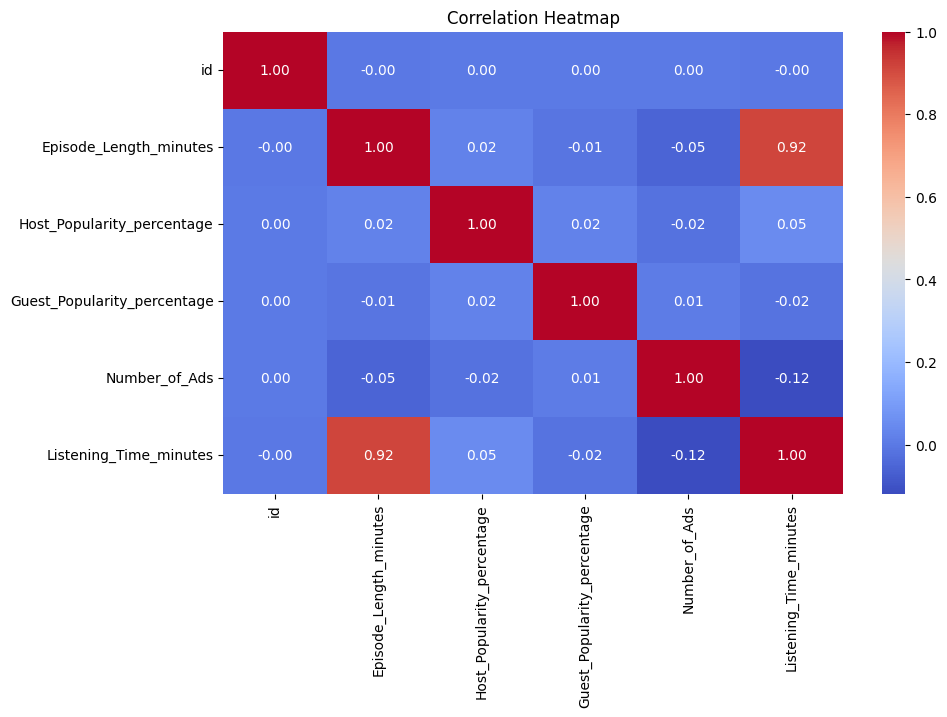

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.dtypes

,0
id,int64
Podcast_Name,object
Episode_Title,object
Episode_Length_minutes,float64
Genre,object
Host_Popularity_percentage,float64
Publication_Day,object
Publication_Time,object
Guest_Popularity_percentage,float64
Number_of_Ads,float64


In [ ]:
df.isna().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,87093
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,146030
Number_of_Ads,1


In [ ]:
sp = pd.read_csv('sample_submission.csv')
tst = pd.read_csv('test.csv')
sp.shape, tst.shape

((250000, 2), (250000, 11))

In [ ]:
import numpy as np

# Replace values greater than 200 minutes with NaN
tst['Episode_Length_minutes'] = np.where(
    tst['Episode_Length_minutes'] > 200,
    np.nan,
    tst['Episode_Length_minutes']
)


In [ ]:
origi = pd.read_csv("podcast_dataset.csv")
origi.shape

(52500, 11)

In [ ]:
df = pd.concat([df, origi], ignore_index=True)

In [ ]:
import pandas as pd
# Calculate the mean from non-null values
mean_value = df['Episode_Length_minutes'].mean()

# Fill in missing values in both df and tst
df['Episode_Length_minutes'].fillna(mean_value, inplace=True)

# Do the same for tst if the column exists
if 'Episode_Length_minutes' in tst.columns:
    tst['Episode_Length_minutes'].fillna(mean_value, inplace=True)
else:
    print("Episode_Length_minutes' not found in tst.")
#fill missing values using the mean within those groups.
df['Guest_Popularity_percentage'] = df.groupby('Podcast_Name')['Guest_Popularity_percentage'].transform(
    lambda x: x.fillna(x.mean())
)
tst['Guest_Popularity_percentage'] = tst.groupby('Podcast_Name')['Guest_Popularity_percentage'].transform(
    lambda x: x.fillna(x.mean())
)

df['Number_of_Ads'].fillna(df['Number_of_Ads'].mode()[0], inplace=True)



<ipython-input-9-3678bee52758>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Episode_Length_minutes'].fillna(mean_value, inplace=True)
<ipython-input-9-3678bee52758>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
df.shape

(802500, 12)

In [ ]:
tst.shape

(250000, 11)

In [ ]:
df.isna().sum()

,0
id,52500
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,0
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,0
Number_of_Ads,0


In [ ]:
tst.isna().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,0
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,0
Number_of_Ads,0


In [ ]:
origi = pd.read_csv("podcast_dataset.csv")
origi.shape

(52500, 11)

In [ ]:
origi.isna().sum()

,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,5246
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,5258
Number_of_Ads,0
Episode_Sentiment,0


In [ ]:
df = df.dropna()
tst= tst.dropna()

In [ ]:
tst.isna().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,0
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,0
Number_of_Ads,0


In [ ]:
df["Episode_Title"] = df["Episode_Title"].str.replace("Episode ", "", regex=False).astype(int)
tst["Episode_Title"] = tst["Episode_Title"].str.replace("Episode ", "", regex=False).astype(int)

In [ ]:
df.Episode_Title.unique()

array([ 98,  26,  16,  45,  86,  19,  47,  44,  32,  81,  66,  62,  76,
        37,  20,  82,  72,  61, 100,  54,  17,  36,  97,  27,  31,  88,
        38,  92,  74,  30,  63,  67,  77,   4,  93,  24,   1,   2,  25,
        56,  75,  12,  21,   6,  85,  23,  33,   7,  53,  15,  43,  71,
        69,  13,  89,   3,  64,  73,  79,  94,  80,  42,  10,  48,  96,
        40,  49,   9,  50,  78,  84,  87,  58,  57,  59,  39,  46,  91,
        35,   8,  90,   5,  65,  11,  51,  99,  14,  41,  18,  95,  83,
        55,  29,  68,  34,  22,  60,  52,  28,  70])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Separate encoders for each feature
podcast_enc = LabelEncoder()
genre_enc = LabelEncoder()
day_enc = LabelEncoder()
time_enc = LabelEncoder()
sentiment_enc = LabelEncoder()

df["Podcast_Name"] = podcast_enc.fit_transform(df["Podcast_Name"])
tst["Podcast_Name"] = podcast_enc.transform(tst["Podcast_Name"])

df["Genre"] = genre_enc.fit_transform(df["Genre"])
tst["Genre"] = genre_enc.transform(tst["Genre"])

df["Publication_Day"] = day_enc.fit_transform(df["Publication_Day"])
tst["Publication_Day"] = day_enc.transform(tst["Publication_Day"])

df["Publication_Time"] = time_enc.fit_transform(df["Publication_Time"])
tst["Publication_Time"] = time_enc.transform(tst["Publication_Time"])

df["Episode_Sentiment"] = sentiment_enc.fit_transform(df["Episode_Sentiment"])
tst["Episode_Sentiment"] = sentiment_enc.transform(tst["Episode_Sentiment"])


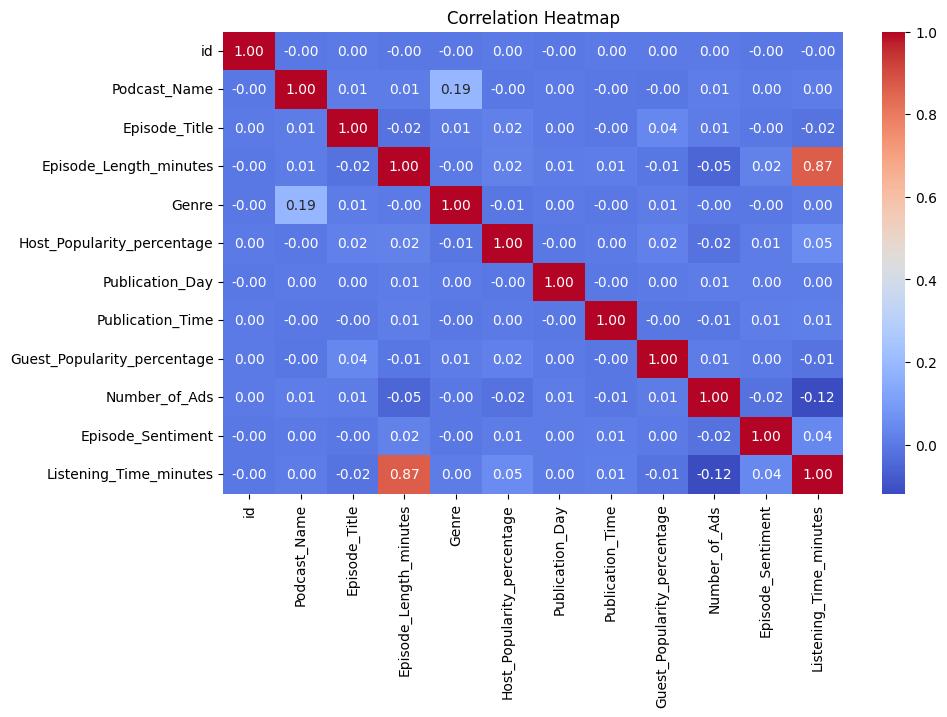

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
numeric_cols = tst.select_dtypes(include=['int64', 'float64']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(tst, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Detect and print outliers
outliers = detect_outliers_iqr(tst, numeric_cols)
for col, vals in outliers.items():
    print(f"\nOutliers in {col}:\n{vals}")



Outliers in id:
Series([], Name: id, dtype: float64)

Outliers in Podcast_Name:
Series([], Name: Podcast_Name, dtype: int64)

Outliers in Episode_Title:
Series([], Name: Episode_Title, dtype: int64)

Outliers in Episode_Length_minutes:
101637    325.24
Name: Episode_Length_minutes, dtype: float64

Outliers in Genre:
Series([], Name: Genre, dtype: int64)

Outliers in Host_Popularity_percentage:
Series([], Name: Host_Popularity_percentage, dtype: float64)

Outliers in Publication_Day:
Series([], Name: Publication_Day, dtype: int64)

Outliers in Publication_Time:
Series([], Name: Publication_Time, dtype: int64)

Outliers in Guest_Popularity_percentage:
Series([], Name: Guest_Popularity_percentage, dtype: float64)

Outliers in Number_of_Ads:
211159     53.37
283606    103.91
436577    103.00
495919     53.42
537705    103.75
567235     12.00
602553    103.25
672139    103.25
683147    103.88
Name: Number_of_Ads, dtype: float64

Outliers in Episode_Sentiment:
Series([], Name: Episode_Senti

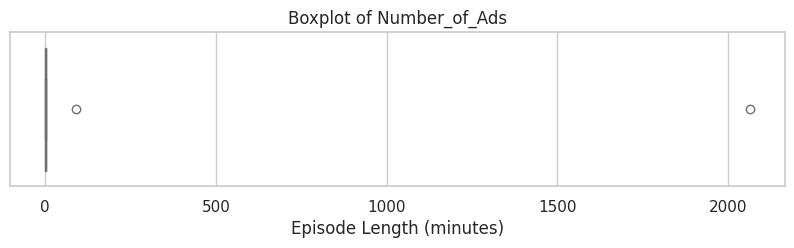

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seting style
sns.set(style="whitegrid")

# Create boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=tst['Number_of_Ads'], color='skyblue')
plt.title('Boxplot of Number_of_Ads')
plt.xlabel('Episode Length (minutes)')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
y_train = df["Listening_Time_minutes"]
# X = df.drop(columns=['Listening_Time_minutes', 'id'])  # drop more if needed
X_train = df.drop(columns=['Listening_Time_minutes', 'id'])  # drop more if needed
X_test = tst.drop(columns=['id'])  # drop more if needed



In [ ]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
# Create a DataFrame with 'id' and predicted values (y_pred)
tst_predictions = pd.DataFrame({
    'id': tst.loc[X_test.index, 'id'],  # Retrieve 'id' from the original DataFrame using the indices of X_test
    'Listening_Time_minutes': y_pred
})

# Show the result
print(tst_predictions)

            id  Listening_Time_minutes
0       750000               56.205884
1       750001               22.714847
2       750002               48.734732
3       750003               71.843148
4       750004               45.681526
...        ...                     ...
249995  999995               10.849948
249996  999996               60.573261
249997  999997                8.706176
249998  999998               76.209105
249999  999999               59.130121

[250000 rows x 2 columns]


In [ ]:
tst_predictions.to_csv('submission5.csv', index=False)


In [ ]:
sub = pd.read_csv('submission5.csv')
sub.head()

,id,Listening_Time_minutes
0,750000,56.205884
1,750001,22.714847
2,750002,48.734732
3,750003,71.843148
4,750004,45.681526


In [ ]:
sub.shape

(250000, 2)